# MARKET SEGMENTATION OF CREDIT CARD CUSTOMERS

Author: Kevin Lee<br />Email: kvnlee97@gmail.com

### EXPLORING THE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc_df = pd.read_csv('/Users/davidlee/Documents/Work/brooklyn/data/CC GENERAL.csv')

In [3]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
cc_df.info()
cc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### CHECKING FOR MISSING DATA

In [5]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()
cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].mean()

In [7]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
cc_df.drop('CUST_ID', axis= 1, inplace= True)

In [9]:
cc_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


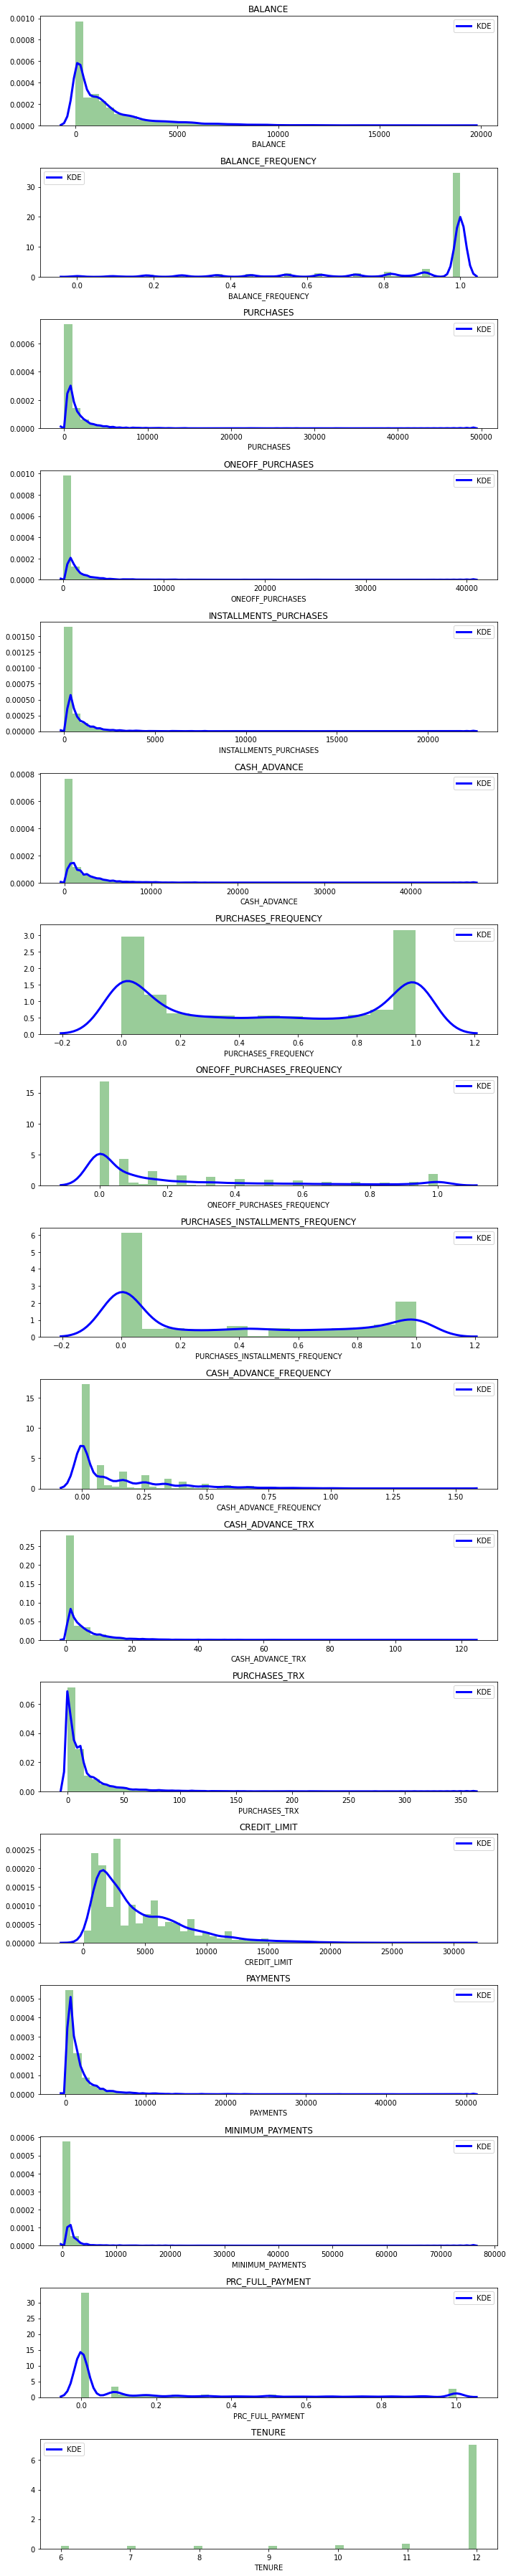

In [10]:
plt.figure(figsize= (10, 50))

for i in range(len(cc_df.columns)):
  plt.subplot(17, 1 , i+1)
  sns.distplot(cc_df[cc_df.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
  plt.title(cc_df.columns[i])

plt.tight_layout()

In [11]:
cc_corr = cc_df.corr()

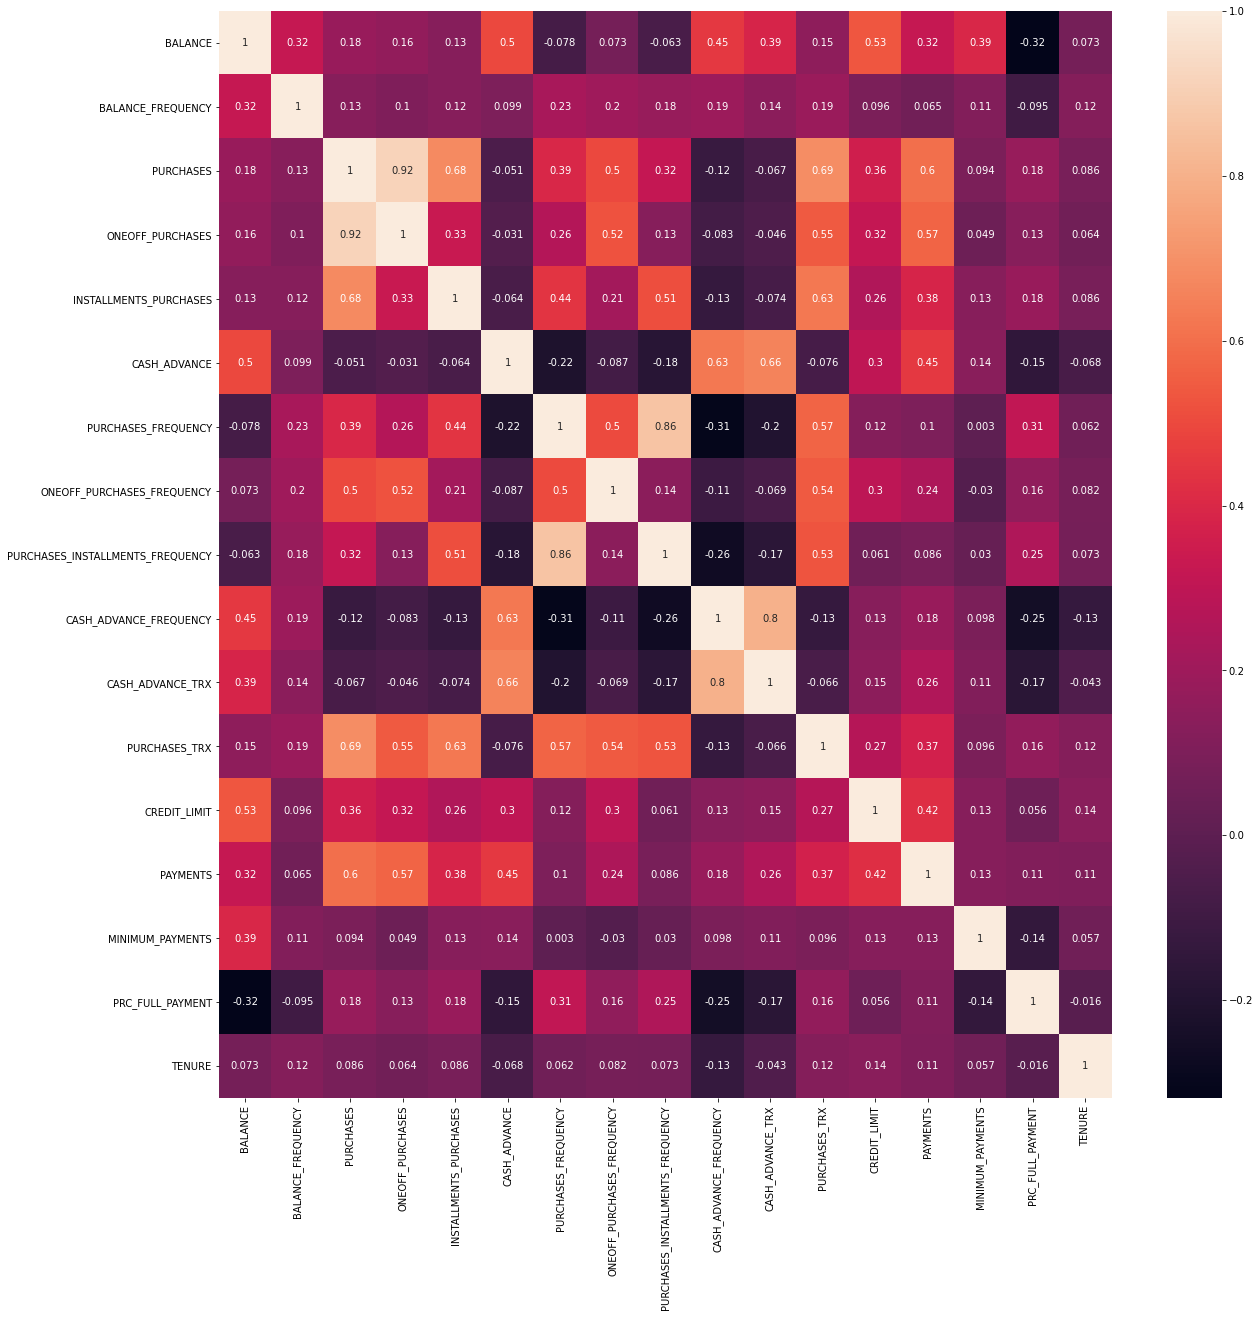

In [12]:
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(cc_corr, annot= True)

### FINDING THE OPTIMAL NUMBER OF CLUSTERS

In [13]:
scaler = StandardScaler()

cc_df_scaled = scaler.fit_transform(cc_df)

In [14]:
score = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(cc_df_scaled)
  score.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

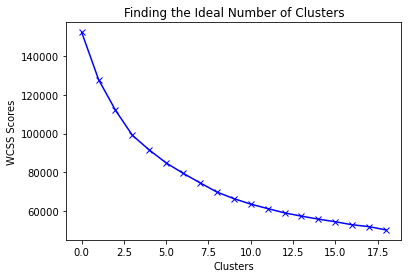

In [15]:
plt.plot(score, 'bx-')
plt.title('Finding the Ideal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show

### APPLYING K-MEANS CLUSTERING

In [16]:
kmeans = KMeans(8)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [cc_df.columns])

In [17]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.167975,0.394381,0.498051,0.637635,0.006027,-0.333762,0.961288,1.900691,0.117559,-0.413955,-0.329268,0.562865,0.399697,0.117824,-0.166016,0.444378,0.263714
1,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
2,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
3,1.690254,0.392898,-0.217939,-0.156243,-0.228335,2.028615,-0.474879,-0.208670,-0.414961,1.928630,1.943303,-0.266165,1.030922,0.828019,0.513059,-0.389775,0.070278
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,-0.366374,0.333743,-0.038609,-0.242316,0.353701,-0.364019,0.987721,-0.382694,1.200432,-0.473742,-0.360262,0.186527,-0.260825,-0.218690,-0.055259,0.309988,0.256465
6,0.989563,0.467012,2.280649,1.713181,2.245211,-0.184369,1.159919,1.525352,1.262971,-0.301817,-0.199892,2.838957,1.241740,1.301672,0.657636,0.235233,0.338206
7,0.019343,0.402984,-0.359400,-0.244098,-0.401235,-0.090181,-0.862896,-0.403340,-0.758852,0.110650,-0.022951,-0.484763,-0.302482,-0.249204,-0.003892,-0.456868,0.272093


In [18]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [cc_df.columns])

In [19]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1214.849238,0.970696,2067.299256,1650.781543,416.517713,278.955605,0.876162,0.769471,0.411158,0.052308,1.001815,28.700544,5948.708959,2074.232777,477.313518,0.283688,11.870236
1,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
2,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
3,5082.596262,0.970345,537.575383,333.105963,204.587367,5232.971707,0.299759,0.140207,0.199521,0.521083,16.510441,8.093968,8245.364902,4130.177668,2059.869986,0.039712,11.611369
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,801.898298,0.956331,920.715593,190.242181,730.915193,215.506994,0.886771,0.088293,0.841520,0.040344,0.790307,19.346192,3545.460041,1100.056711,735.428052,0.244381,11.860534
6,3624.167549,0.987902,5875.847168,3435.966892,2441.384035,592.241479,0.955882,0.657500,0.866374,0.074747,1.884712,85.275689,9012.406015,5501.355605,2396.799812,0.222516,11.969925
7,1604.734958,0.972734,235.340337,187.285152,48.236261,789.757339,0.144029,0.082134,0.062850,0.157286,3.092206,2.660446,3393.895597,1011.722254,855.137313,0.020089,11.881449


In [20]:
cc_df_cluster = pd.concat([cc_df, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


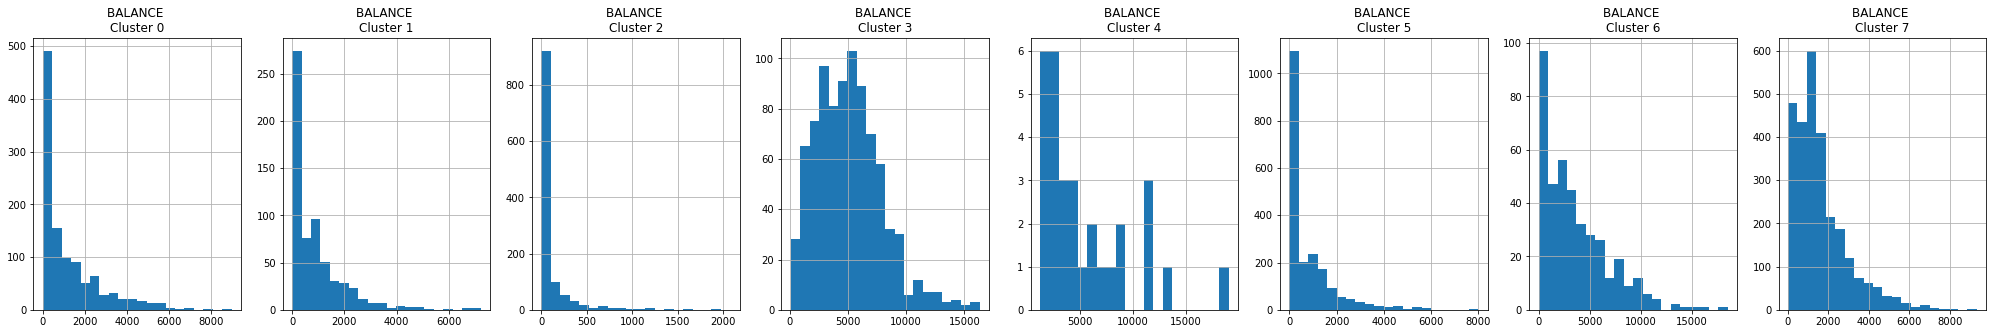

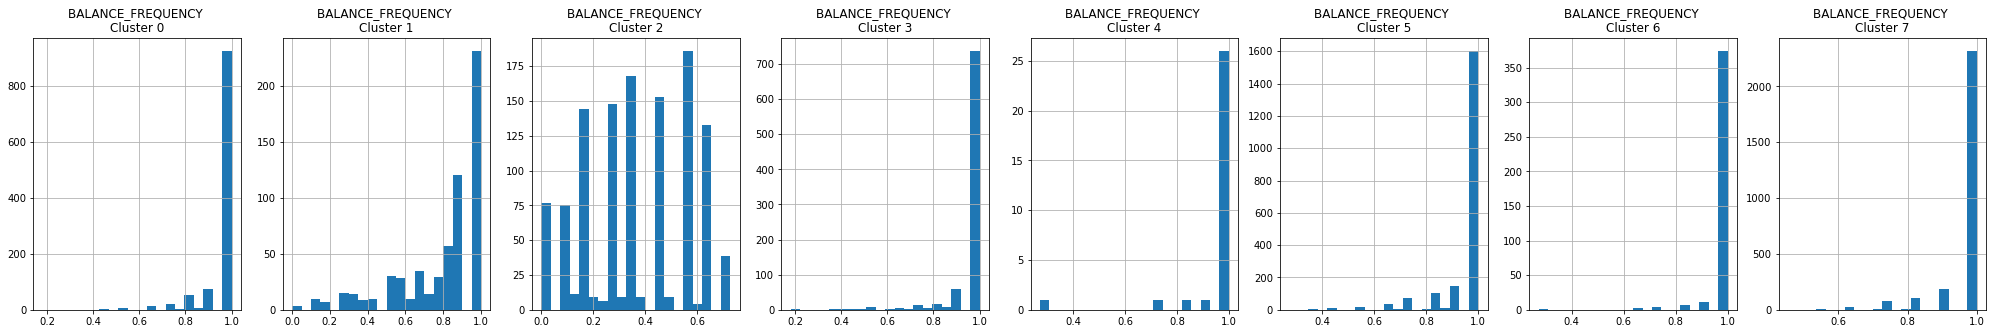

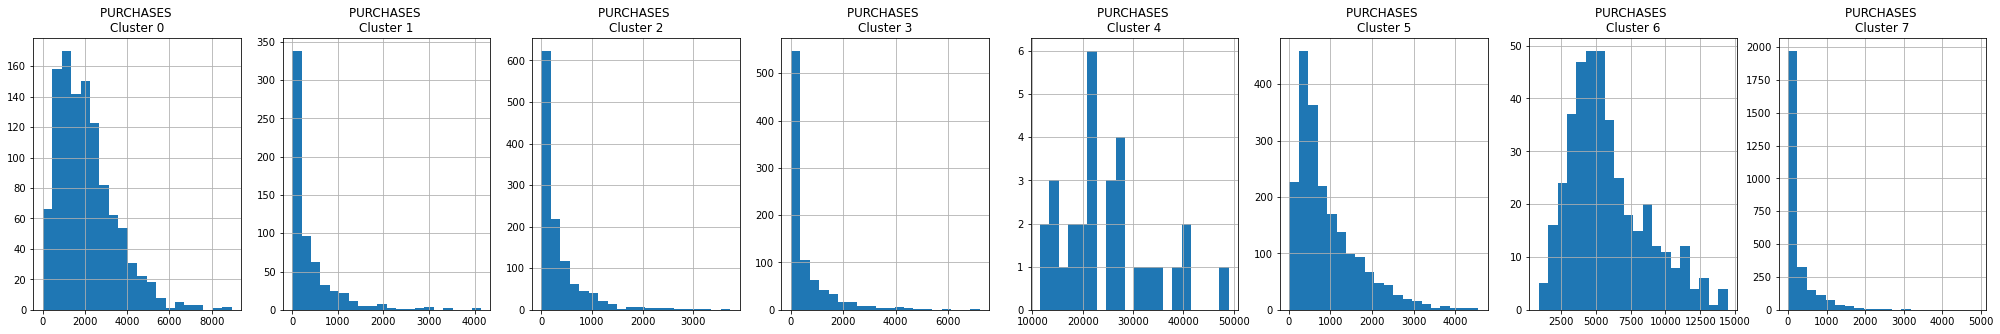

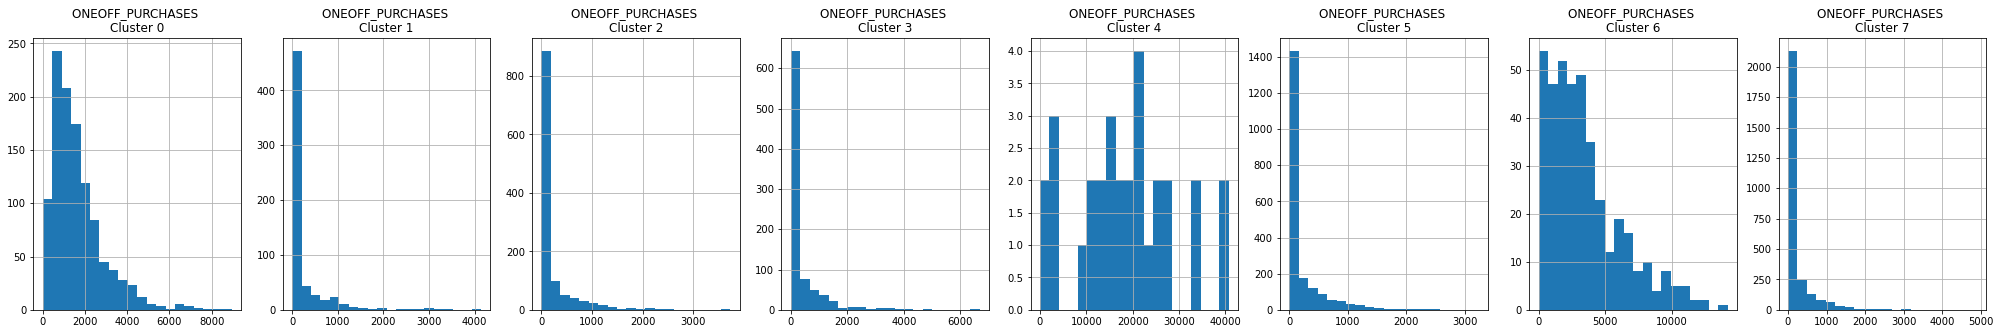

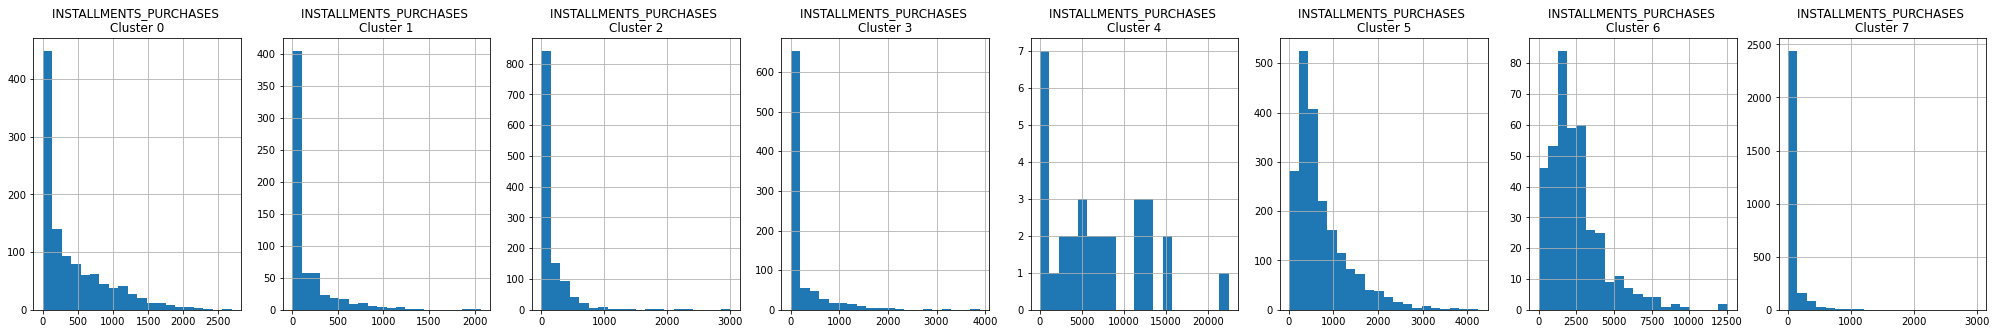

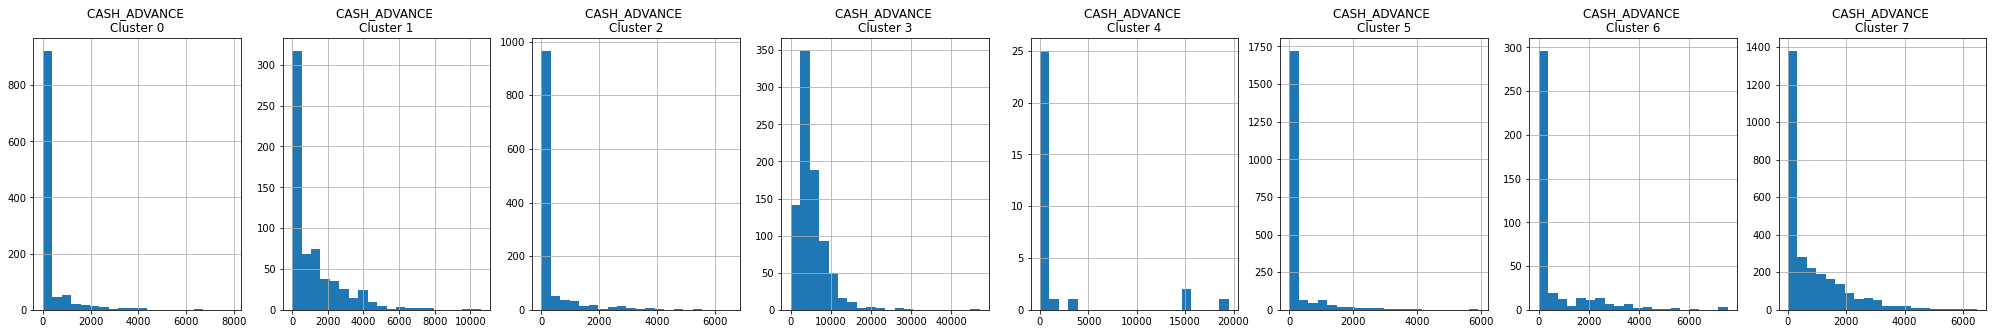

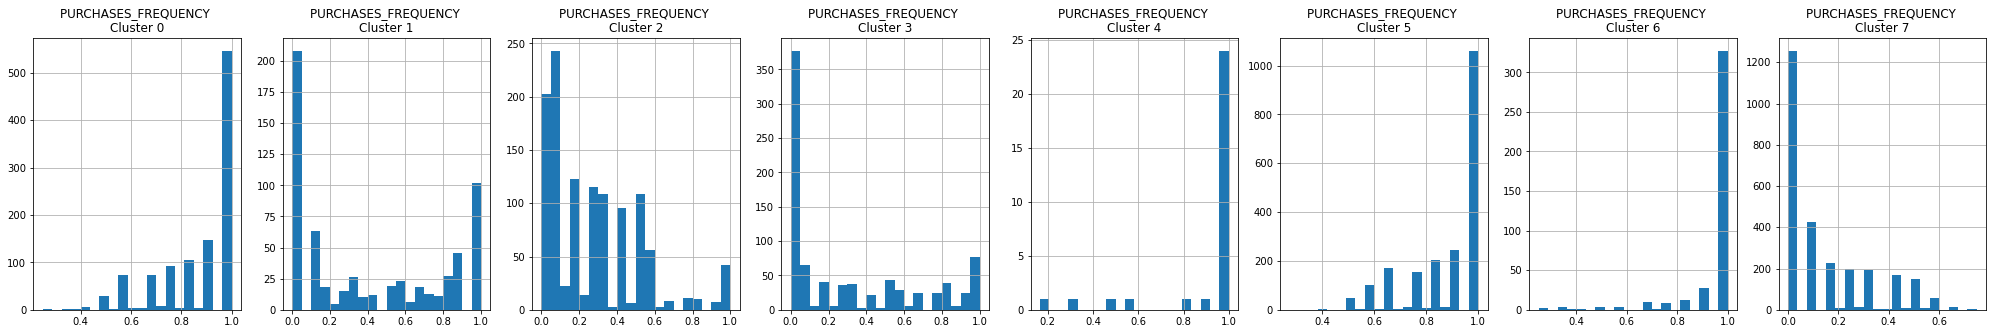

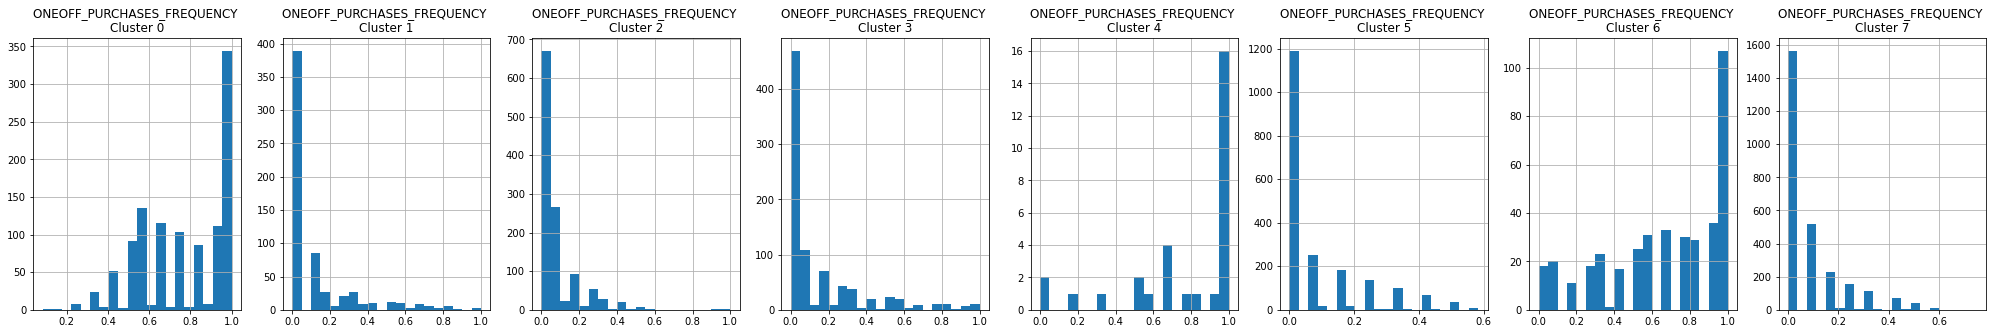

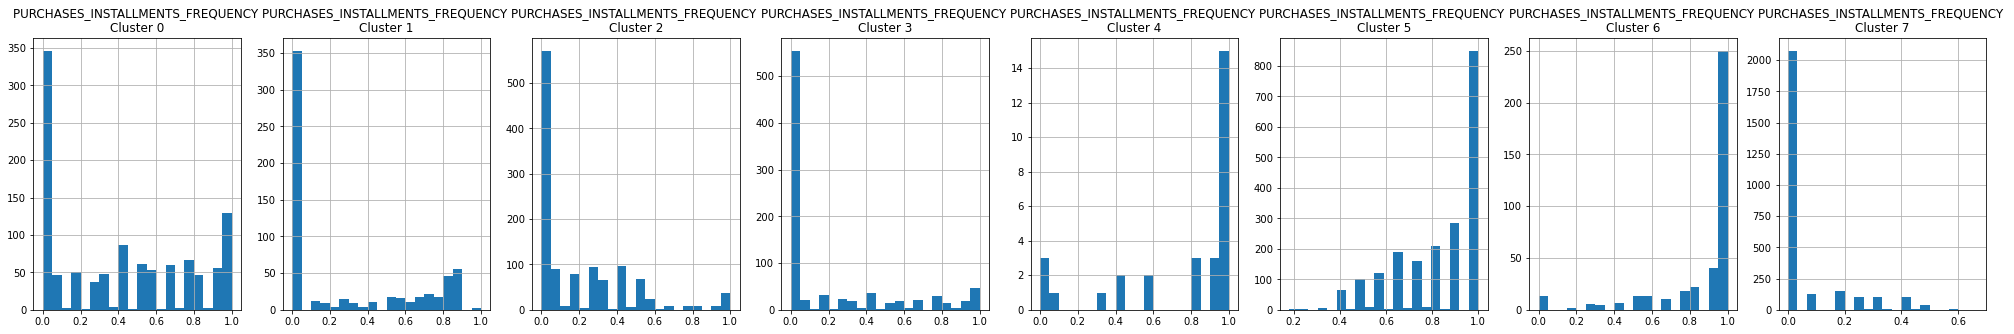

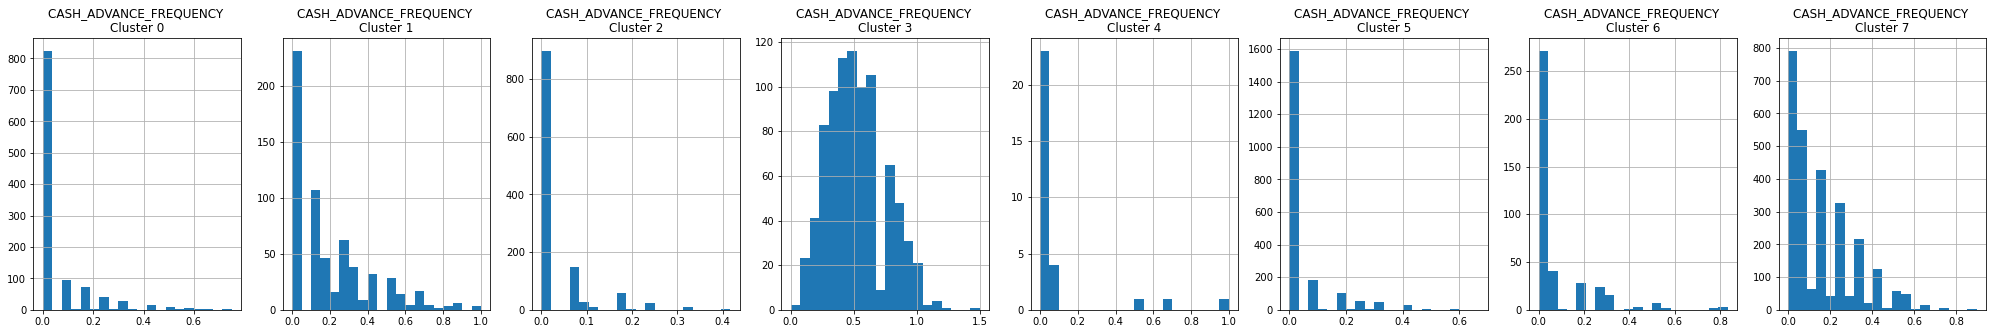

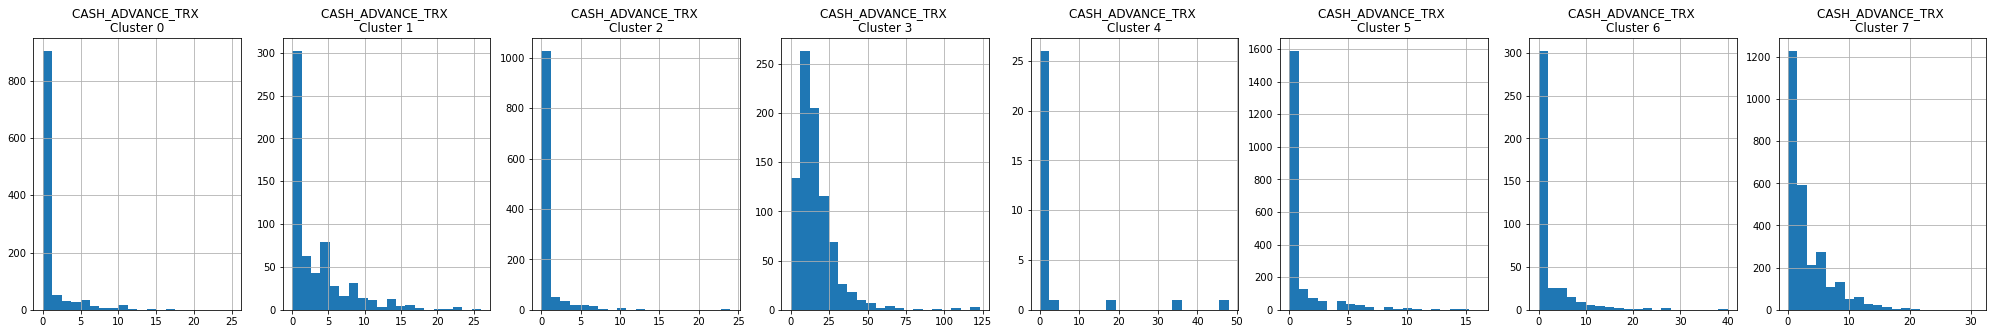

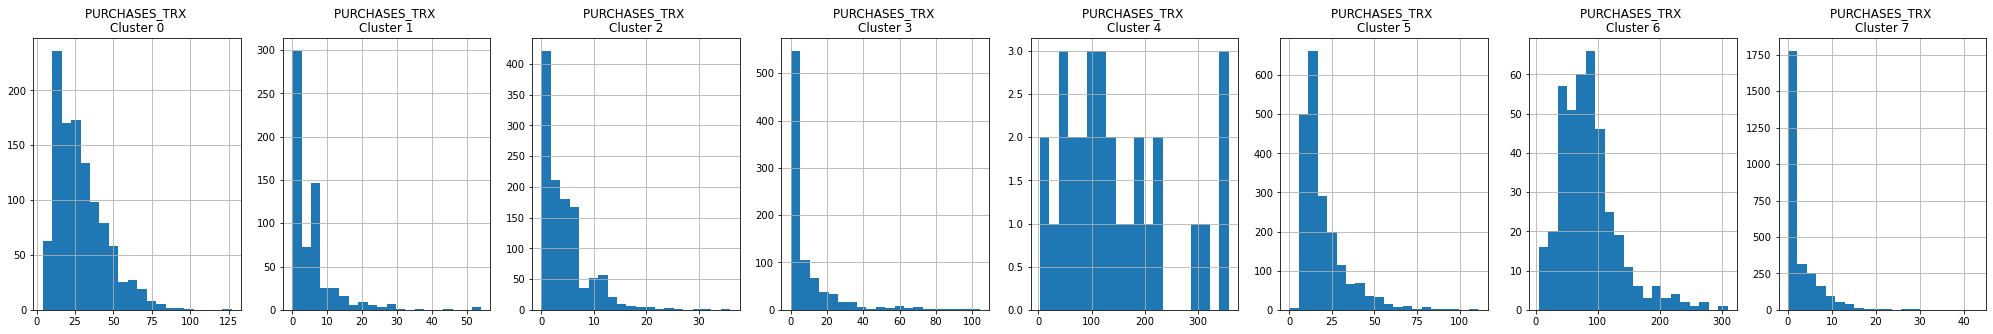

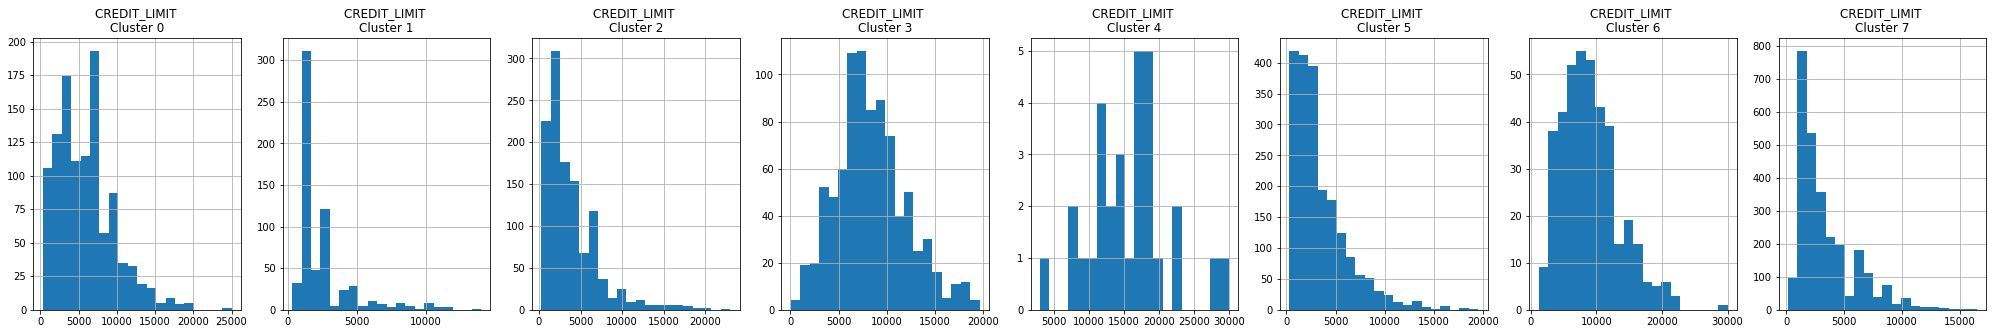

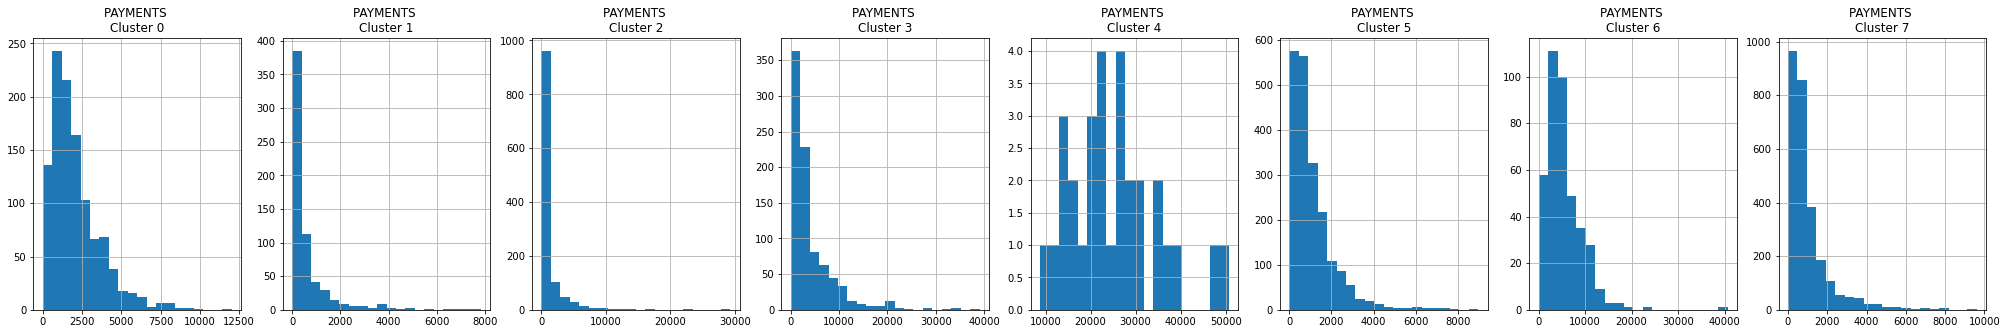

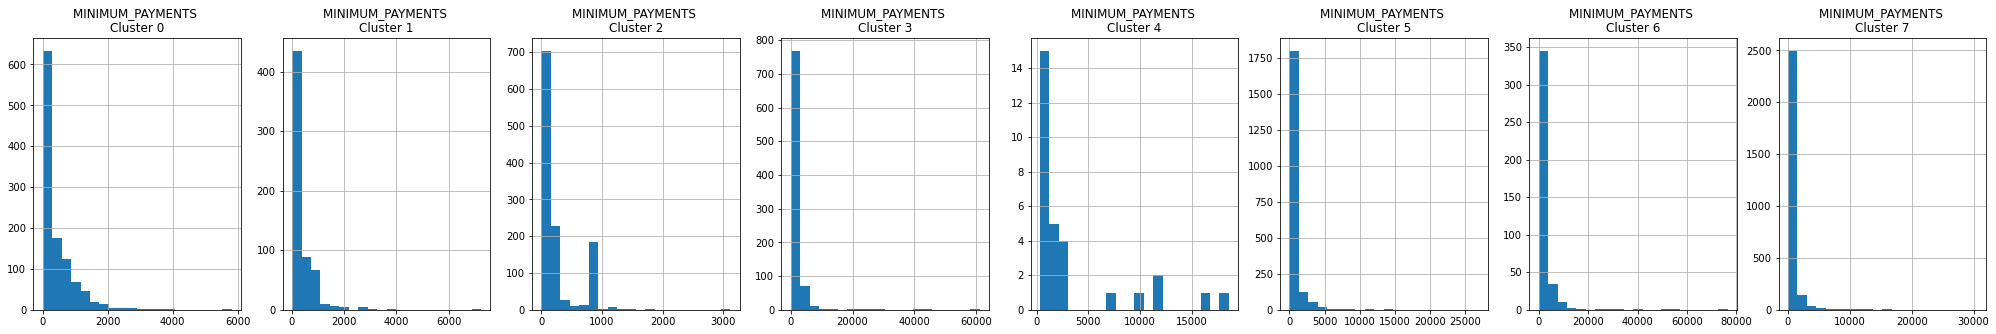

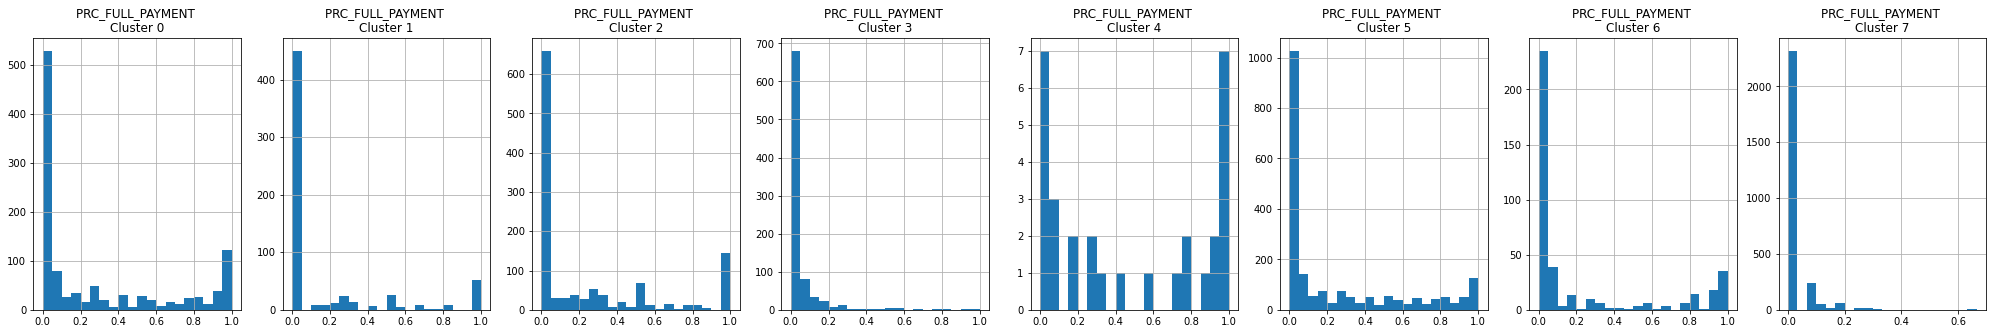

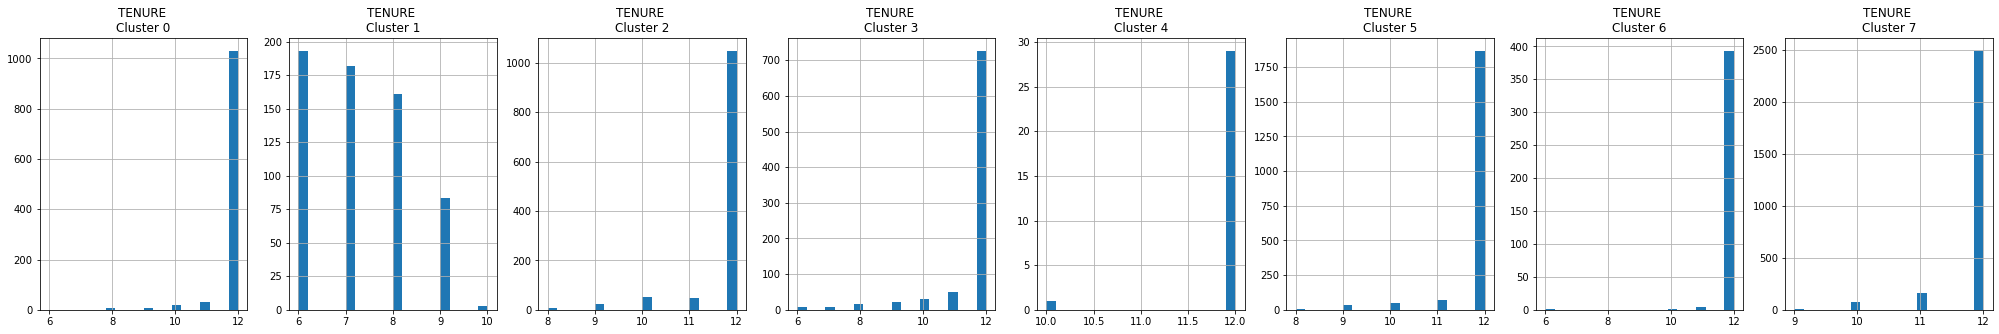

In [21]:
for i in cc_df.columns:
  plt.figure(figsize= (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = cc_df_cluster[cc_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()

### APPLYING PRINCIPAL COMPONENT ANALYSIS

In [22]:
pca = PCA(n_components= 2)
pca_applied = pca.fit_transform(cc_df_scaled)

In [23]:
pca_df = pd.DataFrame(data = pca_applied, columns= ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682220,-1.076449
1,-1.138297,2.506479
2,0.969683,-0.383506
3,-0.873629,0.043170
4,-1.599433,-0.688581


In [24]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis= 1)
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682220,-1.076449,7
1,-1.138297,2.506479,3
2,0.969683,-0.383506,0
3,-0.873629,0.043170,7
4,-1.599433,-0.688581,7


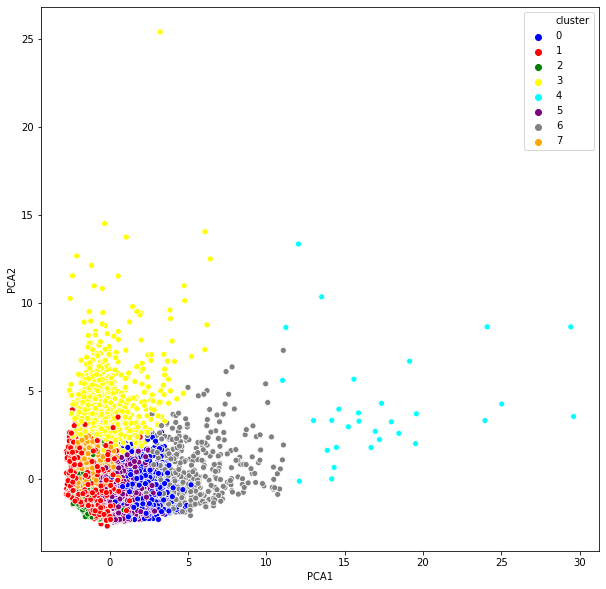

In [25]:
plt.figure(figsize= (10, 10))
ax.set_title('PCA', fontsize = 20)
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette= ['blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'grey', 'orange'])

In [26]:
pca.explained_variance_ratio_

array([0.27290037, 0.20301991])

In [27]:
pca.explained_variance_ratio_.sum()

0.4759202854989075